In [49]:
import numpy as np

In [50]:
%cd "C:\Users\llaur\Downloads\ERA_wind"

C:\Users\llaur\Downloads\ERA_wind


In [51]:
t = np.load('ERA_wind.npz')

In [52]:
list(t.keys())

['lat', 'lon', 'level', 'time', 'rel_hum', 'temp', 'wind_u', 'wind_v']

In [53]:
print(t)

In [54]:
# dir(t)

In [55]:
t.files

['lat', 'lon', 'level', 'time', 'rel_hum', 'temp', 'wind_u', 'wind_v']

In [56]:
for k in t.keys():
    print (k)
    # print(t.get(k)) # same as t[k]


lat
lon
level
time
rel_hum
temp
wind_u
wind_v


In [57]:
print(type(t.get('lat')[0]))

<class 'numpy.float32'>


In [58]:
!pip install cartopy

In [59]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# cartesian product to plot every lat x lon pair
lat = t.get('lat')  
lon = t.get('lon')  
x_grid, y_grid = np.meshgrid(lon, lat, indexing='xy')
x_values = x_grid.flatten()
y_values = y_grid.flatten()

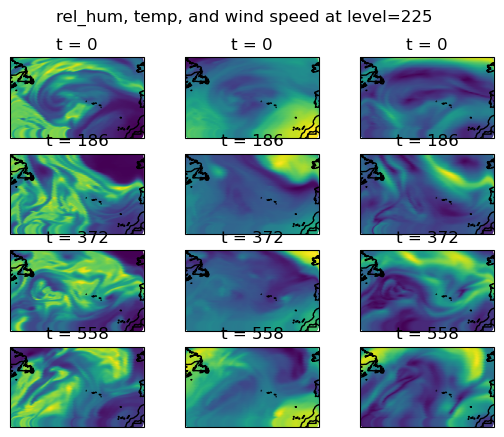

In [60]:
fig, axs = plt.subplots(nrows=4, ncols=3, subplot_kw={'projection': ccrs.PlateCarree()})
fig.suptitle('rel_hum, temp, and wind speed at level=225')

# rel_hum


for r in range(4):
    values = t.get('rel_hum')[int(744*r/4)][1]
    values_flat = values.flatten()
    
    scatter_plot = axs[r,0].scatter(x_values, y_values, c=values_flat, cmap='viridis', s=50, transform=ccrs.PlateCarree())
    axs[r,0].coastlines()
    axs[r,0].add_feature(cfeature.BORDERS)
    axs[r,0].set_title("t = {}".format(int(744*r/4)))



# temp


for r in range(4):
    values = t.get('temp')[int(744*r/4)][1]
    values_flat = values.flatten()
    
    scatter_plot = axs[r,1].scatter(x_values, y_values, c=values_flat, cmap='viridis', s=50, transform=ccrs.PlateCarree())
    axs[r,1].coastlines()
    axs[r,1].add_feature(cfeature.BORDERS)
    axs[r,1].set_title("t = {}".format(int(744*r/4)))
    
# wind speed

min_value = float('inf')
max_value = float('-inf')

for r in range(4):
    u = t.get('wind_u')[int(744*r/4)][1]
    v = t.get('wind_v')[int(744*r/4)][1]
    wind_speed = np.sqrt(u**2 + v**2)
    wind_speed_flat = wind_speed.flatten()
    
    
    scatter_plot = axs[r,2].scatter(x_values, y_values, c=wind_speed_flat, cmap='viridis', s=50, transform=ccrs.PlateCarree())
    axs[r,2].coastlines()
    axs[r,2].add_feature(cfeature.BORDERS)
    axs[r,2].set_title("t = {}".format(int(744*r/4)))
    

plt.show()

In [61]:
# 744 x 4 x 121 x 201 (time x pressure level x latitude x longitude)
# for i in range(121):
#     for j in range(201):
#         print(i,j)
#         triplet_list.append((t.get('lat'), t.get('lon'), (t.get('rel_hum')[0][1][i][j])))

In [62]:
# dictionary of arrays
# pick one "level" and move forward (PRESSURE LEVEL)


# gregorian date to calendar datetime
# splitting data into train, validation, and test
# temperature and wind speed 
# plot on a 2d map projection
    # final two dimensions of wind data will help for mapping 
# plot histograms (pick a few grid points) and visualize where the region actually is (box above the atlantic)
    # take a couple of points in the grid and compare over time
    # distributions of what the wind looks like (scalar wind) 
# zhang -- specific parameterization of wind speed 
# compare over water and over land
# differences when the sun rises and sets 

# range of wind speeds and how it changes over the area --> normalizing (outliers)
    # visualizing 
# daytime vs nighttime 
    # July 1 at 12:15AM at Greenwich time 

# cosine of the solar zenith angle 
# wind speeds more complex during the daytime 

# day vs. night
# water vs. land

